# Forecasting

## Predicting customer demand

### Cleaning Erroneous Data

In [1]:
#importing the carsales data using pandas

import pandas as pd
carsales = pd.read_csv('carsales.csv')
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [2]:
# changing the column names in dataset

carsales.columns = ['month', 'sales']
carsales.head()

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [3]:
#displaying the last rows of the dataset

carsales.tail()

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


In [4]:
#removing the last row of the dataset

carsales = carsales.loc[:107,:].copy()
carsales.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [5]:
#defining a new column called period

carsales['period'] = list(range(108))
carsales.head()

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2
3,1960-04,14395.0,3
4,1960-05,14587.0,4


### Plotting data to find trends

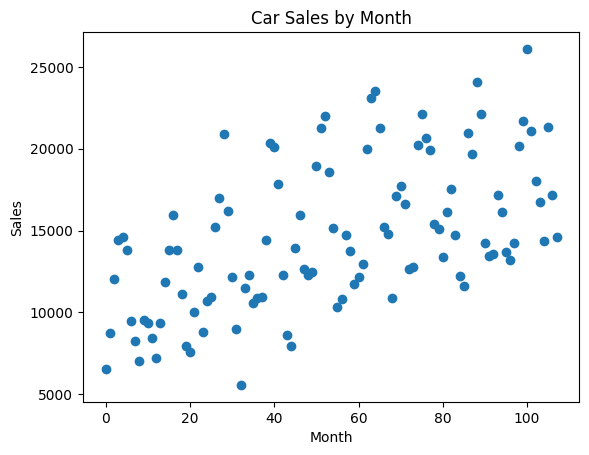

In [6]:
#creating a scatter plot of period and sales

import matplotlib.pyplot as plt
plt.scatter(carsales['period'], carsales['sales'])
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Performing Linear Regression

In [7]:
#Performing linear regression on period and sales

x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [8]:
#Getting the coefficient and intercept

print(model.coef_)
print(model.intercept_)

[[81.20250174]]
[10250.77726809]


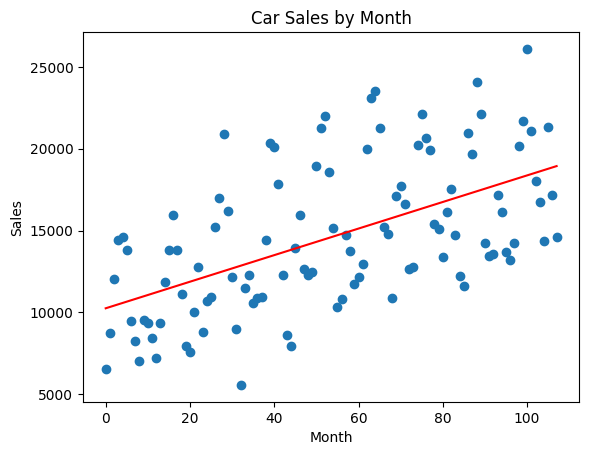

In [9]:
#Plotting the regression line on a scatter plot of period and sales

plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x, model.predict(x), color='red')
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Calculating Error Measurements

In [10]:
# Calculating the error from the above regression

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 13879284.808238056
R-squared: 0.3158854329342885


In [11]:
# calculating the mean absolute error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3154.377291328597


In [12]:
# calculate the root mean sqauared error

rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 3725.4912170394464


### Using Regression to forecast future trends

In [13]:
#extending our period column
import numpy as np

x_extended = np.append(carsales['period'].values, np.arange(108,116) )

In [14]:
#using the predict method to calculate the values that will be on our regression line

y_extended = model.predict(x_extended.reshape(-1,1))

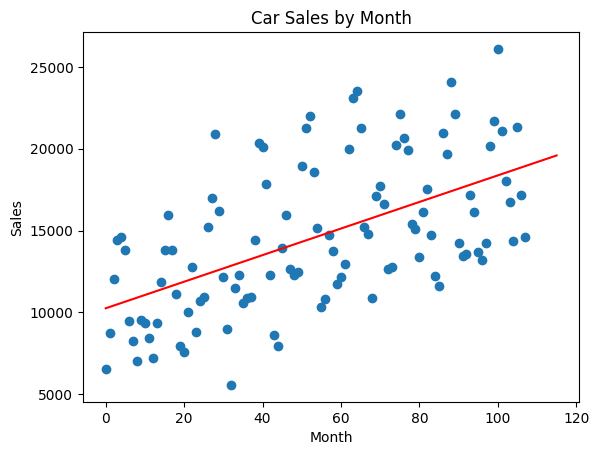

In [15]:
#plotting the extended regression line on the scatter plot of period and sales

plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x_extended, y_extended, color='red')
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Trying more regression models

Multivariate Linear regression to predict Sales

In [16]:
#Creating new cols(variables) from the dataset

carsales['quadratic'] = carsales['period'].apply(lambda x: x**2)
carsales['cubic'] = carsales['period'].apply(lambda x: x**3)

x3 = carsales.loc[:,['period', 'quadratic', 'cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3,y)

LinearRegression()

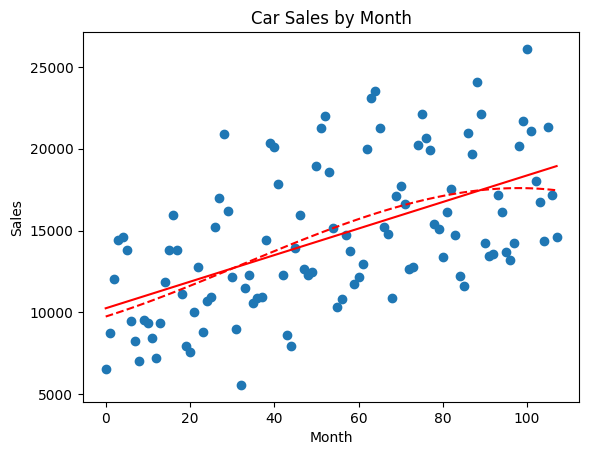

In [17]:
#plotting the regressor_cubic line on the scatter plot of period and sales

plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x, model.predict(x), "r-")
plt.plot(x, regressor_cubic.predict(x3), "r--")
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [18]:
# printing the regressor_cubic coef and intercept

print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


### Trigonometry to Capture Variations

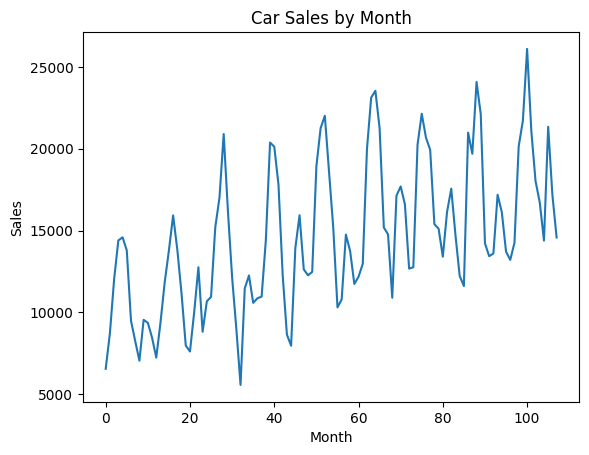

In [19]:
#creating a line plot of period vs sales

plt.plot(carsales['period'], carsales['sales'])
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [20]:
import math

carsales['sin_period'] = carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period'] = carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:,['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig,y)

LinearRegression()

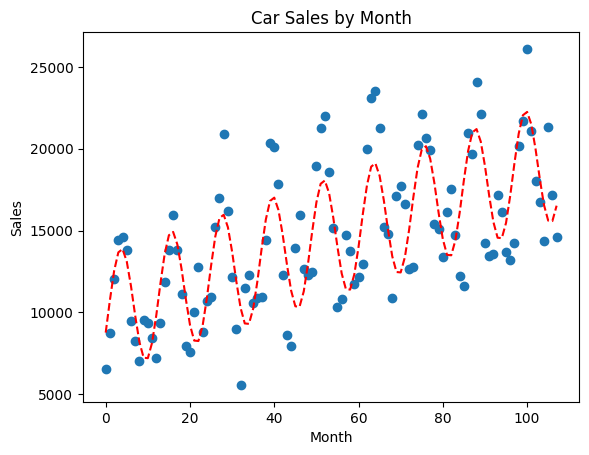

In [21]:
#plotting the regressor_trig line in the scatter plot of period and sales

plt.scatter(carsales['period'], carsales['sales'])
#plt.plot(x, model.predict(x), "r-")
plt.plot(x, regressor_trig.predict(x_trig), "r--")
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Choosing the best regression to use for forecasting

In [22]:
#adding squareroot , exponent 1.5 and log to the dataset

carsales['squareroot'] = carsales['period'].apply(lambda x: math.sqrt(x))
carsales['exponent'] = carsales['period'].apply(lambda x: x**1.5)
carsales['log'] = carsales['period'].apply(lambda x: math.log(x+1))

x_new = carsales.loc[:,['period', 'quadratic', 'cubic', 'sin_period', 'cos_period', 'squareroot', 'exponent', 'log']].values.reshape(-1,8)
y = carsales['sales'].values.reshape(-1,1)

regressor_new = LinearRegression()
regressor_new.fit(x_new,y)

LinearRegression()

In [23]:
#checking the root square mean error

from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor_new.predict(x_new)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6814155.855283095
R-squared: 0.6641279902197594


In [24]:
#taking the sqaure root of the error

rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2610.3938122978866


In [25]:
#spliting the data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

#using linear regression on the training data

regressor_new.fit(x_train, y_train)

#making predictions on the test data

y_pred = regressor_new.predict(x_test)

#calculating the error metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# obtaining the root mean squared error

rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 741317768.2403127
R-squared: -48.62531794611793
Root Mean Squared Error: 27227.151306009095
